In [27]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
data = pd.read_csv('regression_data1.csv')

In [29]:
data.head()

,HV1,IC1,IC2,IC3,IC4,IC5,AVGGIFT,TARGET_D
0,2346,420,446,468,503,14552,15.500000,21.0
1,497,350,364,357,384,11696,3.080000,3.0
2,1229,469,502,507,544,17313,7.500000,20.0
3,325,148,181,171,209,6334,6.700000,5.0
4,768,174,201,220,249,7802,8.785714,10.0


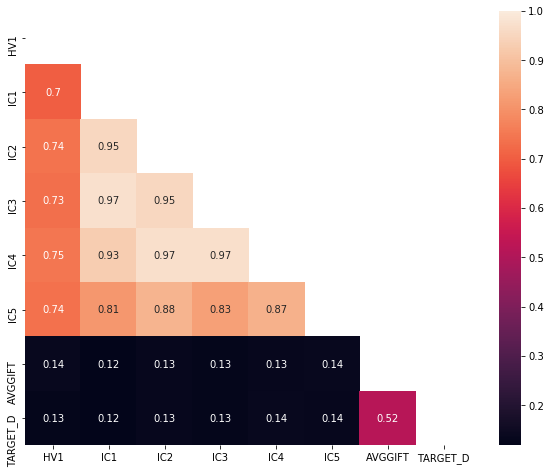

In [30]:
correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [31]:
# Strong correlations: IC1 and IC2, IC3, and IC4. IC2 and IC3, IC4. IC3 and IC4 IC4 and IC1, IC2 and IC3. 
# Because of this concept multicollinearilty, they all showing a type of income with a close correlation, so lets drop IC2, IC3 and IC4.

In [32]:
data = data.drop(['IC2', 'IC3', 'IC4'], axis = 1)

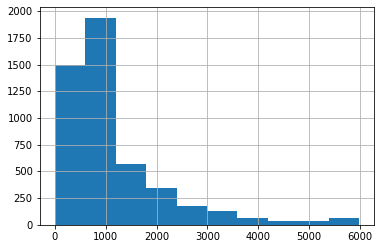

In [33]:
data['HV1'].hist()
plt.show()

# Skew right# - tail is on left side
# More cheap houses than expensive houses, and a some very expensive houses, most houses are stacked around the 100,000 mark
# No gaps, which indicates that there is no crazy outliers - no bad data

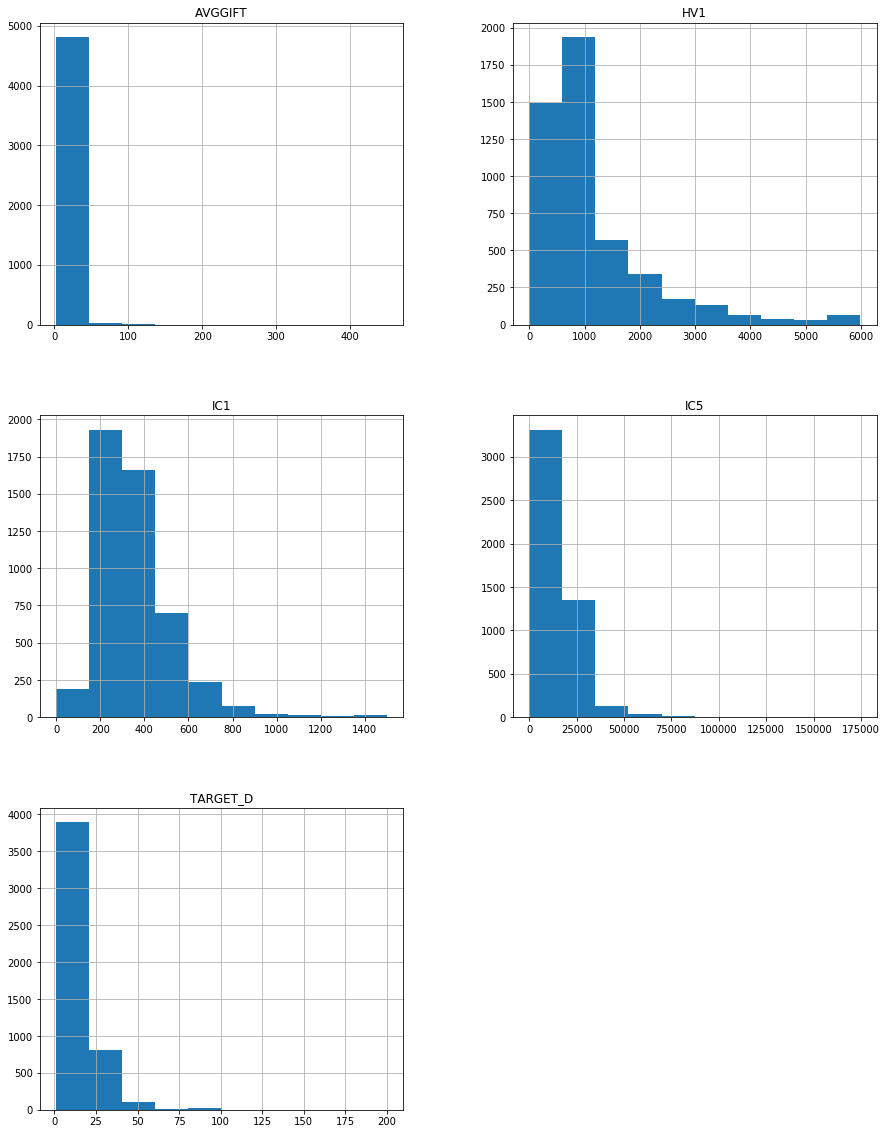

In [34]:
data.hist(figsize = (15,20))
plt.show()

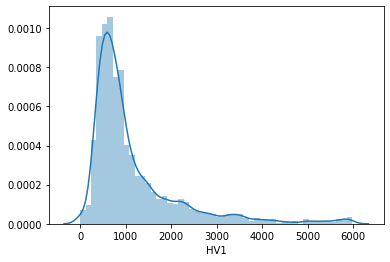

In [35]:
sns.distplot(data['HV1'])
plt.show()

In [36]:
column = data['HV1']
max_value = column.max()
max_value

5982

In [37]:
column = data['HV1']
min_value = column.min()
min_value

0

In [38]:
# How to display a picture from your computer

#from IPython.display import Image
#Image('logvlinear.png')

In [39]:
# Log transformation

# Since some values might become -inf, we will have values to filter those values. Remember we might not need all values (for e.g. there are no negative values of houses)
# Data points in the tail are spread out, data in the middle stay the same and data in the skew are squeezed together

In [40]:
# Code to test how the transformation is going to look 

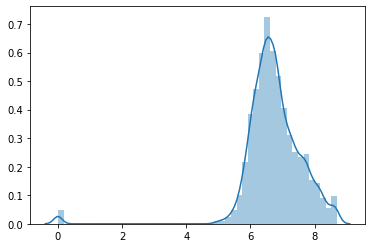

In [41]:
def log_transfom_clean(x):      # Define function
    x = np.log(x)
    if np.isfinite(x):          
        return x
    else:
        return 0   # in the code to be used with dataframe, we will use np 
HV1_log = list(map(log_transfom_clean, data['HV1']))
sns.distplot(HV1_log);

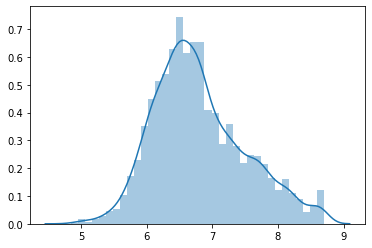

In [44]:
def log_transfom_clean(x):      # Define function
    x = np.log(x)
    if np.isfinite(x):          
        return x
    else:
        return np.NAN   # We are returning NaN instead, so that we can replace that with mean later
data['HV1_log'] = list(map(log_transfom_clean, data['HV1']))
sns.distplot(HV1_log);

In [45]:
data['HV1_log'] = data['HV1_log'].fillna(np.mean(data['HV1_log']))

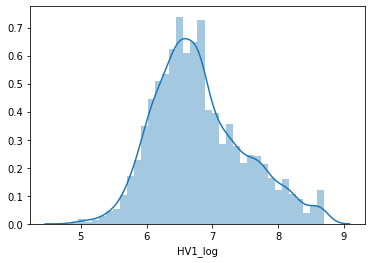

In [47]:
sns.distplot(data['HV1_log']);

In [48]:
# If we are confident with our new data we can delete the original column from the original data

# data = data.drop(['HV1'], axis=1)
# data.head()

In [49]:
data.head()

,HV1,IC1,IC5,AVGGIFT,TARGET_D,HV1_log
0,2346,420,14552,15.500000,21.0,7.760467
1,497,350,11696,3.080000,3.0,6.208590
2,1229,469,17313,7.500000,20.0,7.113956
3,325,148,6334,6.700000,5.0,5.783825
4,768,174,7802,8.785714,10.0,6.643790


In [50]:
# Box cox transformation for making data normal (standardise)
# Make choise how close your original data will look to a normal distribution

In [51]:
# Rules for Box Cox
# Data has to be positive - filter out any negative values, if you dont want to remove values replace it with the mean
# 

In [ ]:
# You can use one or the other method to get your data ready for processing